# Project Summary


### Model 1 - Logestic Regression
    *   Model 1A - Logestic Regression
        * max_iter = 10
        * Train Accuracy = 0.4839
        * Test Accuracy = 0.1640
    *   Model 1B - Logestic Regression
          * max_iter = 50
          * Train Accuracy = 0.9521
          * Test Accuracy = 0.2072
    *   Model 1C - Logestic Regression
          * max_iter = 200
          * Train Accuracy = 1
          * Test Accuracy = 0.2505
    *   Model 1D - Logestic Regression
          * parameters = {dual:True, max_iter:200, random_state:10, solver:'liblinear'}
          * Train Accuracy = 1
          * Test Accuracy = 0.2482

### Model 2 - KNN
    * Model 2A - KNN
        * n_neighbors = 3
        * Train Accuracy = 0.4635
        * Test Accuracy = 0.1685
    * Model 2B - KNN
        * Grid Search CV {n_neighbors : 2}
        * n_neighbors = 2
        * Train Accuracy = 0.5764
        * Test Accuracy = 0.1936

### Model 3 - Gaussian Naive Bayes Algorithm
    * Train Accuracy = 0.8211
    * Test Accuracy = 0.1548

###  Model 4 - Multinomial Naive Bayes Algorithm
      * Train Accuracy = 0.7063
      * Test Accuracy = 0.1167

### Model 5 - Decision Tree
    *   Model 5A - Decision Tree
          * Train Accuracy = 1
          * Test Accuracy = 0.3257
    *   Model 5B - Decision Tree
          * Randomized Search CV { criterion :'entropy', min_samples_split : 6,max_depth : 8}
          * Train Accuracy = 1
          * Test Accuracy = 0.2665
    *   Model 5C - Decision Tree
          * Grid Search CV {max_depth : 7, min_samples_split : 5}
          * Train Accuracy = 0.4564
          * Test Accuracy = 0.2209
    *   Model 5D - Decision Tree with Ada Boost
          * { criterion : entropy}
          * Train Accuracy = 1
          * Test Accuracy = 0.3189
    *   Model 5E - Decision Tree with One-Vs-One Multiclass Classification
          * { criterion : entropy}
          * Train Accuracy = 1
          * Test Accuracy = 0.3599
    *   Model 5F - Decision Tree with One-Vs-Rest Multiclass Classification
          * { criterion : entropy}
          * Train Accuracy = 1
          * Test Accuracy = 0.4171

### Model 6 - Random Forest
    *   Model 6A - Random Forest
          * {criterion='gini'}
          * Train Accuracy = 1
          * Test Accuracy = 0.6947
    *   Model 6B - Random Forest
          * Grid Search CV {criterion='entropy', n_estimator: 180, 'warm_start':'False','min_samples_split':6, 'max_depth' :5}
          * Train Accuracy = 1
          * Test Accuracy = 0.3940


# Imports and Data Loading

## Import Lib

In [ ]:
# Pandas and Numpy
import numpy as np
from numpy import asarray
import pandas as pd

# Charting and plotting
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# Saving the best model
import joblib

# Ignore Warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# SKLearn lib
from sklearn import metrics
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_curve, accuracy_score, f1_score, log_loss

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler , MinMaxScaler

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier


In [ ]:
import datetime
import random
import math
import re # Regular expression library
from pickle import load, dump
from itertools import chain # import chain

## Loading Dataset

In [ ]:
path = '/content/drive/MyDrive/Mtech_Project/Dataset_Pose/Complete_landmark_IQR.csv'
df_landmark =  pd.read_csv(path)

In [ ]:
df_landmark

,Unnamed: 0,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,0,Poor,MVI_9740,0.0,0.554496,0.838187,0.541458,0.851108,0.535251,0.876889,...,0.886799,0.553980,0.875453,0.406508,0.889142,0.549191,0.857058,0.410023,0.873106,1.0
1,1,Poor,MVI_9740,40.0,0.554297,0.838304,0.540913,0.851934,0.535071,0.876347,...,0.895191,0.552354,0.879196,0.404798,0.897827,0.547828,0.861282,0.408076,0.881905,2.0
2,2,Poor,MVI_9740,80.0,0.554416,0.838873,0.540774,0.852190,0.534971,0.876794,...,0.900114,0.551111,0.881510,0.403723,0.902898,0.546612,0.864185,0.406815,0.886480,3.0
3,3,Poor,MVI_9740,120.0,0.554179,0.837562,0.540777,0.851432,0.535164,0.876312,...,0.900283,0.550759,0.882917,0.402930,0.903061,0.546411,0.865957,0.405994,0.887066,4.0
4,4,Poor,MVI_9740,160.0,0.554257,0.837522,0.540611,0.849596,0.534609,0.873970,...,0.901123,0.550163,0.882620,0.402751,0.903937,0.546070,0.865288,0.405875,0.887454,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146195,146195,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,81.0
146196,146196,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,82.0
146197,146197,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,83.0
146198,146198,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,84.0


## Train Test Split

In [ ]:
poses = list(set(df_landmark.POSE))
print(poses)

['Laptop', 'Price', 'Sick', 'Sunday', 'Science', 'Priest', 'Poor', 'Plane', 'Tall', 'You', 'Letter', 'Suit', 'Pocket', 'Technology', 'King', 'Dog', 'Card', 'Tool', 'Patient', 'Team', 'Hello', 'Yesterday', 'Queen', 'Grandmother', 'Radio', 'Gift', 'Soft', 'Evening', 'Door', 'Mouse', 'Marriage', 'Afternoon', 'Computer', 'Lamp', 'Sport', 'Tuesday', 'Fish', 'Bad', 'Monsoon', 'Beautiful', 'Good_night', 'Pencil', 'Mean', 'Quiet', 'Page', 'Sad', 'Thank_you', 'Pink', 'Month', 'Saturday', 'Today', 'Yellow', 'They', 'Hour', 'High', 'Deaf', 'Box', 'Blind', 'Night', 'Bed', 'Exercise', 'Clothing', 'Red', 'Second', 'Car', 'Thursday', 'Pen', 'Telephone', 'Shirt', 'Reporter', 'Good_evening', 'Summer', 'Mother', 'Soldier', 'Friend', 'Big', 'Green', 'Narrow', 'Actor', 'Monday', 'Nice', 'Table', 'Healthy', 'Money', 'Wednesday', 'Spring', 'Soap', 'Female', 'Year', 'Heavy', 'Lock', 'Light', 'Male', 'Father', 'Gun', 'Grey', 'Loud', 'Sign', 'Flat', 'Man', 'Low', 'It', 'Good_afternoon', 'Curved', 'Paint', 'Cam

In [ ]:
train_imgs = list()
test_imgs = list()
for word in poses:
  imgs = list(set(df_landmark[df_landmark.POSE == word].IMG))
  random.shuffle(imgs)
  count = len(imgs)
  if count > 1:
    train_count = math.trunc(0.80*count)
    #print('Pose:',word,'|','Count:',count,'|','Train:',train_count)
    train_lst = imgs[:train_count]
    train_imgs.extend(train_lst)
    test_lst = imgs[train_count:count]
    test_imgs.extend(test_lst)
    print('Pose:',word,'|','Count:',count,'|','Train:',train_lst,'|','Test:',test_lst)
  else:
    print('Pose:',word,'|','Count:',count,'| Omited')

Pose: Laptop | Count: 9 | Train: ['MVI_5402', 'MVI_5401', 'MVI_4545', 'MVI_5399', 'MVI_4546', 'MVI_9107', 'MVI_9108'] | Test: ['MVI_4548', 'MVI_4547']
Pose: Price | Count: 10 | Train: ['MVI_8737', 'MVI_8988', 'MVI_8736', 'MVI_4331', 'MVI_8735', 'MVI_4330', 'MVI_8987', 'MVI_8734'] | Test: ['MVI_4329', 'MVI_8986']
Pose: Sick | Count: 7 | Train: ['MVI_9282', 'MVI_9528', 'MVI_5253', 'MVI_9529', 'MVI_9442'] | Test: ['MVI_9443', 'MVI_9527']
Pose: Sunday | Count: 10 | Train: ['MVI_4590', 'MVI_4588', 'MVI_9141', 'MVI_9139', 'MVI_5444', 'MVI_9140', 'MVI_5445', 'MVI_4589'] | Test: ['MVI_5443', 'MVI_4586']
Pose: Science | Count: 9 | Train: ['MVI_8743', 'MVI_4864', 'MVI_8993', 'MVI_8742', 'MVI_8994', 'MVI_8745', 'MVI_8992'] | Test: ['MVI_4863', 'MVI_8744']
Pose: Priest | Count: 9 | Train: ['MVI_4486', 'MVI_4490', 'MVI_8889', 'MVI_8887', 'MVI_4487', 'MVI_4489', 'MVI_4770'] | Test: ['MVI_4488', 'MVI_8888']
Pose: Poor | Count: 8 | Train: ['MVI_9738', 'MVI_9600', 'MVI_9604', 'MVI_9739', 'MVI_9601', 'M

In [ ]:
len(train_imgs)

1277

In [ ]:
print(train_imgs)

['MVI_5402', 'MVI_5401', 'MVI_4545', 'MVI_5399', 'MVI_4546', 'MVI_9107', 'MVI_9108', 'MVI_8737', 'MVI_8988', 'MVI_8736', 'MVI_4331', 'MVI_8735', 'MVI_4330', 'MVI_8987', 'MVI_8734', 'MVI_9282', 'MVI_9528', 'MVI_5253', 'MVI_9529', 'MVI_9442', 'MVI_4590', 'MVI_4588', 'MVI_9141', 'MVI_9139', 'MVI_5444', 'MVI_9140', 'MVI_5445', 'MVI_4589', 'MVI_8743', 'MVI_4864', 'MVI_8993', 'MVI_8742', 'MVI_8994', 'MVI_8745', 'MVI_8992', 'MVI_4486', 'MVI_4490', 'MVI_8889', 'MVI_8887', 'MVI_4487', 'MVI_4489', 'MVI_4770', 'MVI_9738', 'MVI_9600', 'MVI_9604', 'MVI_9739', 'MVI_9601', 'MVI_9603', 'MVI_3172', 'MVI_3237', 'MVI_3235', 'MVI_8582', 'MVI_4173', 'MVI_4174', 'MVI_3144', 'MVI_8581', 'MVI_3234', 'MVI_3142', 'MVI_3207', 'MVI_3206', 'MVI_3143', 'MVI_9309', 'MVI_5115', 'MVI_9384', 'MVI_9307', 'MVI_9224', 'MVI_9464', 'MVI_0069', 'MVI_8822', 'MVI_4419', 'MVI_4417', 'MVI_4418', 'MVI_8824', 'MVI_9054', 'MVI_9055', 'MVI_8823', 'MVI_3698', 'MVI_8602', 'MVI_3990', 'MVI_3697', 'MVI_3843', 'MVI_3841', 'MVI_3991', 'MV

In [ ]:
len(test_imgs)

439

In [ ]:
print(test_imgs)

['MVI_4548', 'MVI_4547', 'MVI_4329', 'MVI_8986', 'MVI_9443', 'MVI_9527', 'MVI_5443', 'MVI_4586', 'MVI_4863', 'MVI_8744', 'MVI_4488', 'MVI_8888', 'MVI_9737', 'MVI_9740', 'MVI_3208', 'MVI_3115', 'MVI_3173', 'MVI_3236', 'MVI_9386', 'MVI_5116', 'MVI_9997', 'MVI_4416', 'MVI_9056', 'MVI_8825', 'MVI_3842', 'MVI_4199', 'MVI_3715', 'MVI_4892', 'MVI_8953', 'MVI_4825', 'MVI_3803', 'MVI_3950', 'MVI_3086', 'MVI_3087', 'MVI_8853', 'MVI_4448', 'MVI_9088', 'MVI_4456', 'MVI_4475', 'MVI_8880', 'MVI_8947', 'MVI_4818', 'MVI_8684', 'MVI_0090', 'MVI_9168', 'MVI_3953', 'MVI_8641', 'MVI_5109', 'MVI_3795', 'MVI_4564', 'MVI_4444', 'MVI_8848', 'MVI_9665', 'MVI_9663', 'MVI_9194', 'MVI_8770', 'MVI_9018', 'MVI_4161', 'MVI_3101', 'MVI_3102', 'MVI_2993', 'MVI_8943', 'MVI_8678', 'MVI_9192', 'MVI_5396', 'MVI_4543', 'MVI_4528', 'MVI_4319', 'MVI_8978', 'MVI_8724', 'MVI_4597', 'MVI_9145', 'MVI_3069', 'MVI_3092', 'MVI_3067', 'MVI_9514', 'MVI_9207', 'MVI_9205', 'MVI_9726', 'MVI_9571', 'MVI_0004', 'MVI_0057', 'MVI_8787', 'MV

# Preprocessing

## Remove unwanted columns

In [ ]:
df_landmark.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df_landmark.head()

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,Poor,MVI_9740,0.0,0.554496,0.838187,0.541458,0.851108,0.535251,0.876889,0.533856,...,0.886799,0.553980,0.875453,0.406508,0.889142,0.549191,0.857058,0.410023,0.873106,1.0
1,Poor,MVI_9740,40.0,0.554297,0.838304,0.540913,0.851934,0.535071,0.876347,0.533239,...,0.895191,0.552354,0.879196,0.404798,0.897827,0.547828,0.861282,0.408076,0.881905,2.0
2,Poor,MVI_9740,80.0,0.554416,0.838873,0.540774,0.852190,0.534971,0.876794,0.533399,...,0.900114,0.551111,0.881510,0.403723,0.902898,0.546612,0.864185,0.406815,0.886480,3.0
3,Poor,MVI_9740,120.0,0.554179,0.837562,0.540777,0.851432,0.535164,0.876312,0.533345,...,0.900283,0.550759,0.882917,0.402930,0.903061,0.546411,0.865957,0.405994,0.887066,4.0
4,Poor,MVI_9740,160.0,0.554257,0.837522,0.540611,0.849596,0.534609,0.873970,0.532880,...,0.901123,0.550163,0.882620,0.402751,0.903937,0.546070,0.865288,0.405875,0.887454,5.0


# X and Y Split

In [ ]:
print(list(df_landmark.columns))

['POSE', 'IMG', 'TS', 'LEFT_WRIST_x', 'LEFT_WRIST_y', 'LEFT_THUMB_CMC_x', 'LEFT_THUMB_CMC_y', 'LEFT_THUMB_MCP_x', 'LEFT_THUMB_MCP_y', 'LEFT_THUMB_IP_x', 'LEFT_THUMB_IP_y', 'LEFT_THUMB_TIP_x', 'LEFT_THUMB_TIP_y', 'LEFT_INDEX_FINGER_MCP_x', 'LEFT_INDEX_FINGER_MCP_y', 'LEFT_INDEX_FINGER_PIP_x', 'LEFT_INDEX_FINGER_PIP_y', 'LEFT_INDEX_FINGER_DIP_x', 'LEFT_INDEX_FINGER_DIP_y', 'LEFT_INDEX_FINGER_TIP_x', 'LEFT_INDEX_FINGER_TIP_y', 'LEFT_MIDDLE_FINGER_MCP_x', 'LEFT_MIDDLE_FINGER_MCP_y', 'LEFT_MIDDLE_FINGER_PIP_x', 'LEFT_MIDDLE_FINGER_PIP_y', 'LEFT_MIDDLE_FINGER_DIP_x', 'LEFT_MIDDLE_FINGER_DIP_y', 'LEFT_MIDDLE_FINGER_TIP_x', 'LEFT_MIDDLE_FINGER_TIP_y', 'LEFT_RING_FINGER_MCP_x', 'LEFT_RING_FINGER_MCP_y', 'LEFT_RING_FINGER_PIP_x', 'LEFT_RING_FINGER_PIP_y', 'LEFT_RING_FINGER_DIP_x', 'LEFT_RING_FINGER_DIP_y', 'LEFT_RING_FINGER_TIP_x', 'LEFT_RING_FINGER_TIP_y', 'LEFT_PINKY_MCP_x', 'LEFT_PINKY_MCP_y', 'LEFT_PINKY_PIP_x', 'LEFT_PINKY_PIP_y', 'LEFT_PINKY_DIP_x', 'LEFT_PINKY_DIP_y', 'LEFT_PINKY_TIP_x', 

In [ ]:
df_landmark[df_landmark.IMG.isin(test_imgs)].tail()

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
145515,Clock,MVI_5379,2240.0,0.539813,0.803207,0.524902,0.808893,0.515032,0.829194,0.510954,...,0.846104,0.528404,0.84423,0.406627,0.844881,0.52421,0.824898,0.409511,0.824831,81.0
145516,Clock,MVI_5379,2240.0,0.539813,0.803207,0.524902,0.808893,0.515032,0.829194,0.510954,...,0.846104,0.528404,0.84423,0.406627,0.844881,0.52421,0.824898,0.409511,0.824831,82.0
145517,Clock,MVI_5379,2240.0,0.539813,0.803207,0.524902,0.808893,0.515032,0.829194,0.510954,...,0.846104,0.528404,0.84423,0.406627,0.844881,0.52421,0.824898,0.409511,0.824831,83.0
145518,Clock,MVI_5379,2240.0,0.539813,0.803207,0.524902,0.808893,0.515032,0.829194,0.510954,...,0.846104,0.528404,0.84423,0.406627,0.844881,0.52421,0.824898,0.409511,0.824831,84.0
145519,Clock,MVI_5379,2240.0,0.539813,0.803207,0.524902,0.808893,0.515032,0.829194,0.510954,...,0.846104,0.528404,0.84423,0.406627,0.844881,0.52421,0.824898,0.409511,0.824831,85.0


In [ ]:
X_train = df_landmark[df_landmark.IMG.isin(train_imgs)].drop(labels=['POSE','IMG','TS','FRAME'], axis=1)
y_train = df_landmark[df_landmark.IMG.isin(train_imgs)]['POSE']
X_test= df_landmark[df_landmark.IMG.isin(test_imgs)].drop(labels=['POSE','IMG','TS','FRAME'], axis=1)
y_test = df_landmark[df_landmark.IMG.isin(test_imgs)]['POSE']

In [ ]:
y_train.head()

85    Daughter
86    Daughter
87    Daughter
88    Daughter
89    Daughter
Name: POSE, dtype: object

# Vectorize the target variable

In [ ]:
vocabulary = list(set(y_train))
vocab_size = len(vocabulary)
print("vocabulary :",vocabulary)
print("vocabulary Size:",vocab_size)

vocabulary : ['Laptop', 'Price', 'Sick', 'Sunday', 'Science', 'Priest', 'Plane', 'Tall', 'Poor', 'You', 'Letter', 'Suit', 'Pocket', 'Technology', 'King', 'Dog', 'Card', 'Tool', 'Patient', 'Team', 'Hello', 'Yesterday', 'Queen', 'Grandmother', 'Radio', 'Gift', 'Soft', 'Evening', 'Door', 'Mouse', 'Marriage', 'Afternoon', 'Computer', 'Lamp', 'Sport', 'Tuesday', 'Fish', 'Bad', 'Monsoon', 'Beautiful', 'Good_night', 'Pencil', 'Mean', 'Quiet', 'Page', 'Sad', 'Thank_you', 'Pink', 'Month', 'Saturday', 'Today', 'Yellow', 'They', 'Hour', 'High', 'Deaf', 'Box', 'Blind', 'Night', 'Bed', 'Exercise', 'Clothing', 'Red', 'Second', 'Car', 'Thursday', 'Pen', 'Telephone', 'Shirt', 'Reporter', 'Good_evening', 'Summer', 'Mother', 'Soldier', 'Friend', 'Big', 'Green', 'Narrow', 'Actor', 'Monday', 'Nice', 'Table', 'Healthy', 'Money', 'Wednesday', 'Spring', 'Soap', 'Year', 'Heavy', 'Lock', 'Light', 'Male', 'Father', 'Gun', 'Grey', 'Loud', 'Sign', 'Flat', 'Man', 'Low', 'It', 'Good_afternoon', 'Curved', 'Paint', '

In [ ]:
#tokenizer = Tokenizer(
#    filters='',
#    lower=True,
#    split=' ')
#tokenizer.fit_on_texts(vocabulary)

In [ ]:
# saving Tokanizer
# dump(tokenizer, open('/content/drive/MyDrive/Mtech_Project/Code/tokenizer_5A.pkl', 'wb'))

In [ ]:
# Load the Tokenizer
tokenizer = load(open('/content/drive/MyDrive/Mtech_Project/Code_OLD/tokenizer_4D.pkl', 'rb'))

In [ ]:
OH_enc = OneHotEncoder(handle_unknown='ignore', max_categories = vocabulary)

## Train Dataset

In [ ]:
y_train.head()

85    Daughter
86    Daughter
87    Daughter
88    Daughter
89    Daughter
Name: POSE, dtype: object

In [ ]:
vocabulary[7]

'Tall'

In [ ]:
len(y_train)

108375

In [ ]:
y_train_token = tokenizer.texts_to_sequences(y_train)

In [ ]:
len(y_train_token)

108375

In [ ]:
y_train_token[22]

[180]

In [ ]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_train_token):
  if len(i) == 2:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [ ]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_train_token):
  if len(i) == 0:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [ ]:
# Train Set
y_train_token = tokenizer.texts_to_sequences(y_train)
# converting 2d list into 1d
# using chain.from_iterables
flatten_list = list(chain.from_iterable(y_train_token))
y_train_df = pd.DataFrame(data = flatten_list, index = y_train.index, columns= ['POSE'])

y_train_df

,POSE
85,180
86,180
87,180
88,180
89,180
...,...
146195,127
146196,127
146197,127
146198,127


In [ ]:
# Train Set

y_train_OH = pd.get_dummies(y_train_df.POSE, prefix='Pose')
y_train_OH.head(2)

,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,Pose_10,...,Pose_223,Pose_224,Pose_225,Pose_226,Pose_227,Pose_228,Pose_229,Pose_230,Pose_231,Pose_232
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('y_train_OH shape =',y_train_OH.shape)

y_train_OH shape = (108375, 232)


## Test Dataset

In [ ]:
y_test_token = tokenizer.texts_to_sequences(y_test)

In [ ]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_test_token):
  if len(i) == 0:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [ ]:
# Test Set
#y_test_token = tokenizer.texts_to_sequences(y_test)
flatten_list = list(chain.from_iterable(y_test_token))
y_test_df = pd.DataFrame(data = flatten_list, index = y_test.index, columns= ['POSE'])
y_test_df

,POSE
0,117
1,117
2,117
3,117
4,117
...,...
145515,90
145516,90
145517,90
145518,90


In [ ]:
# Test Set

y_test_OH = pd.get_dummies(y_test_df.POSE, prefix='Pose')
y_test_OH.head(2)

,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,Pose_10,...,Pose_223,Pose_224,Pose_225,Pose_226,Pose_227,Pose_228,Pose_229,Pose_230,Pose_231,Pose_232
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('y_test_OH shape =',y_test_OH.shape)

y_test_OH shape = (37315, 232)


# Converting to desired Input Format

In [ ]:
# Converting Dataframe to 3D array

X_train_val = X_train.values

y_train_val = y_train_df.values
y_train_val_OH = y_train_OH.values

X_test_val = X_test.values

y_test_val = y_test_df.values
y_test_val_OH = y_test_OH.values

In [ ]:
# reshape input to be 3D [samples, look_back, features]
# samples -> number of videos
# look_back -> number of frames in each videos
# features -> number of columns of each frame

X_train_vec = X_train_val.reshape(-1,85,X_train.shape[1])

y_train_vec = y_train_val.reshape(-1,85,y_train_df.shape[1])
y_train_vec_oh = y_train_val_OH.reshape(-1,85,y_train_OH.shape[1])

X_test_vec = X_test_val.reshape(-1,85,X_test.shape[1])

y_test_vec = y_test_val.reshape(-1,85,y_test_df.shape[1])
y_test_vec_oh = y_test_val_OH.reshape(-1,85,y_test_OH.shape[1])

In [ ]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 85, 130)
y_train shape = (1275, 85, 1)
X_test shape = (439, 85, 130)
y_test shape = (439, 85, 1)


In [ ]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_oh.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_oh.shape)

X_train shape = (1275, 85, 130)
y_train shape = (1275, 85, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 85, 232)


In [ ]:
X_train_vec_1D = X_train_vec.reshape(-1, X_train_vec.shape[1]*X_train_vec.shape[2])

y_train_vec = y_train_vec[:,1,:]
y_train_vec_oh = y_train_vec_oh[:,1,:]

X_test_vec_1D = X_test_vec.reshape(-1, X_test_vec.shape[1]*X_test_vec.shape[2])

y_test_vec = y_test_vec[:,1,:]
y_test_vec_oh = y_test_vec_oh[:,1,:]

In [ ]:
y_train_vec = np.array(list(chain.from_iterable(y_train_vec)))
y_test_vec = np.array(list(chain.from_iterable(y_test_vec)))

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec_oh.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec_oh.shape)

X_train shape = (1275, 11050)
y_train shape = (1275, 232)
X_test shape = (439, 11050)
y_test shape = (439, 232)


# Logestic Regression

## Model 1A - Logestic Regression
max iterations = 10

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
classifier1A = LogisticRegression(random_state = 10,max_iter=10)
classifier1A.fit(X_train_vec_1D, y_train_vec)

LogisticRegression(max_iter=10, random_state=10)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_1 = classifier1A.predict(X_test_vec_1D)

In [ ]:
# predict function under LogisticRegression
y_pred_train_1 = classifier1A.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_1))

Training Accuracy Score 0.483921568627451


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_1))
print('Classification report \n',classification_report(y_test_vec,y_pred_1))

Accuracy Score 0.16400911161731208
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.40      0.50      0.44         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       1.0

<Axes: >

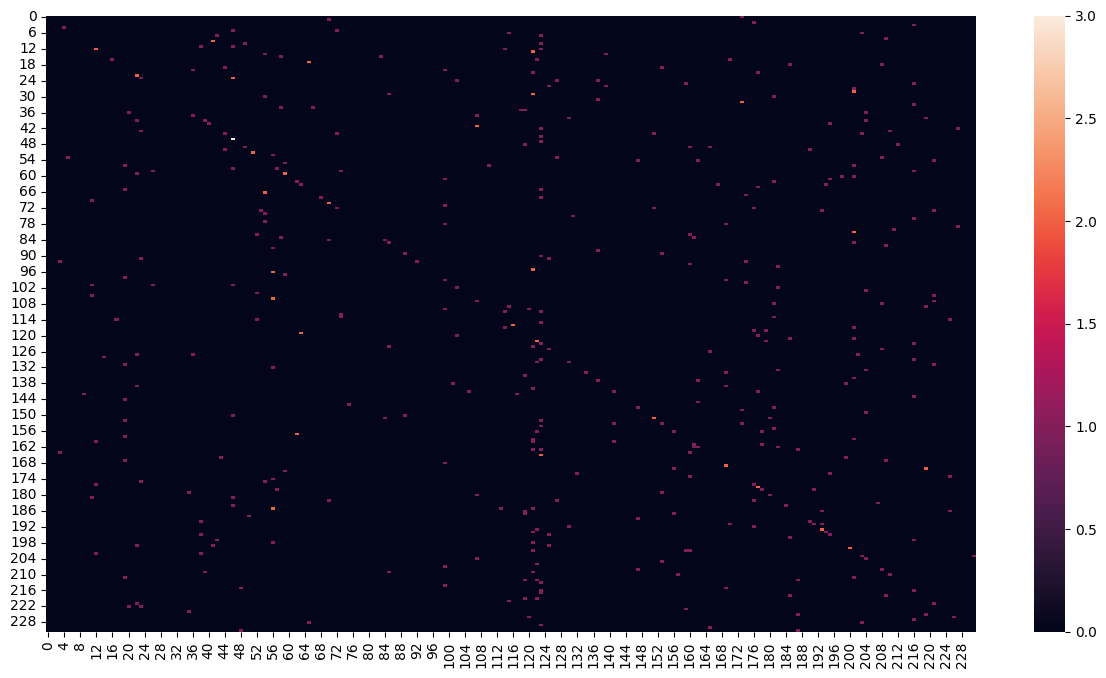

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_1)
sns.heatmap(conf_matrix)

## Model 1B - Logestic Regression
max iterations = 50

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
classifierB = LogisticRegression(random_state = 10,max_iter=50)
classifierB.fit(X_train_vec_1D, y_train_vec)

LogisticRegression(max_iter=50, random_state=10)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_1B = classifierB.predict(X_test_vec_1D)

In [ ]:
# predict function under LogisticRegression
y_pred_train_1B = classifierB.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_1B))

Training Accuracy Score 0.952156862745098


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_1B))
print('Classification report \n',classification_report(y_test_vec,y_pred_1B))

Accuracy Score 0.2072892938496583
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.25      0.50      0.33         2
          13       0.29      0.50      0.36         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.50

<Axes: >

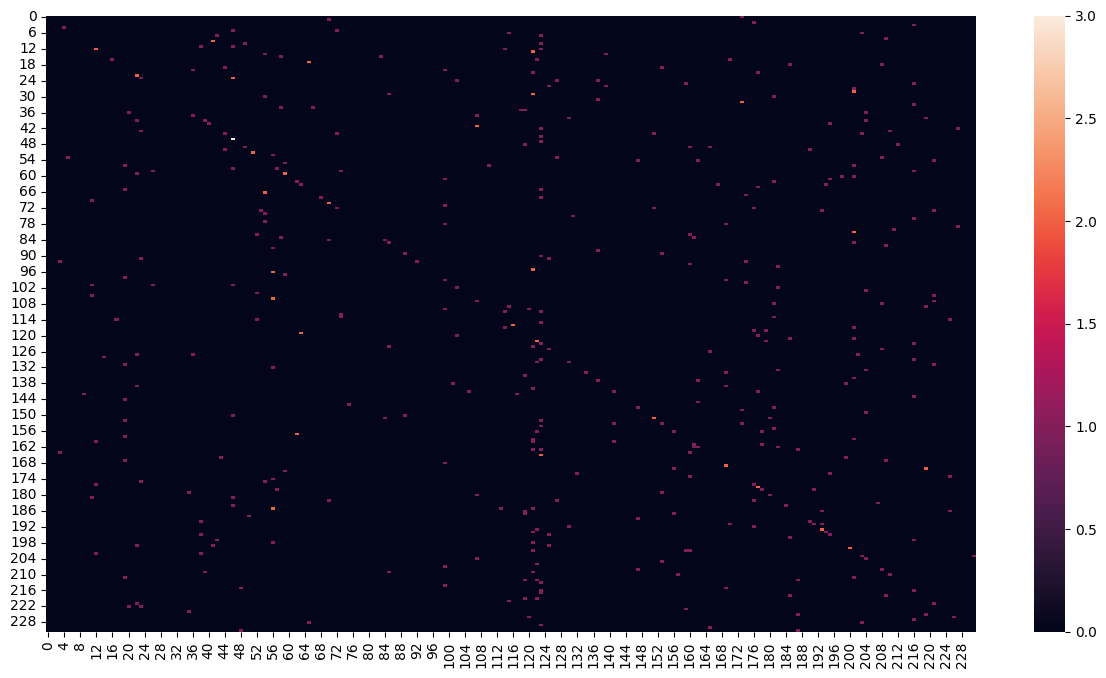

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_1)
sns.heatmap(conf_matrix)

## Model 1C - Logestic Regression
max iterations = 200

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
classifierC = LogisticRegression(random_state = 10,max_iter=200)
classifierC.fit(X_train_vec_1D, y_train_vec)

LogisticRegression(max_iter=200, random_state=10)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_1C = classifierC.predict(X_test_vec_1D)

In [ ]:
# predict function under LogisticRegression
y_pred_train_1C = classifierC.predict(X_train_vec_1D)

### Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_1C))

Training Accuracy Score 1.0


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_1C))
print('Classification report \n',classification_report(y_test_vec,y_pred_1C))

Accuracy Score 0.2505694760820046
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.25      0.25      0.25         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.25

<Axes: >

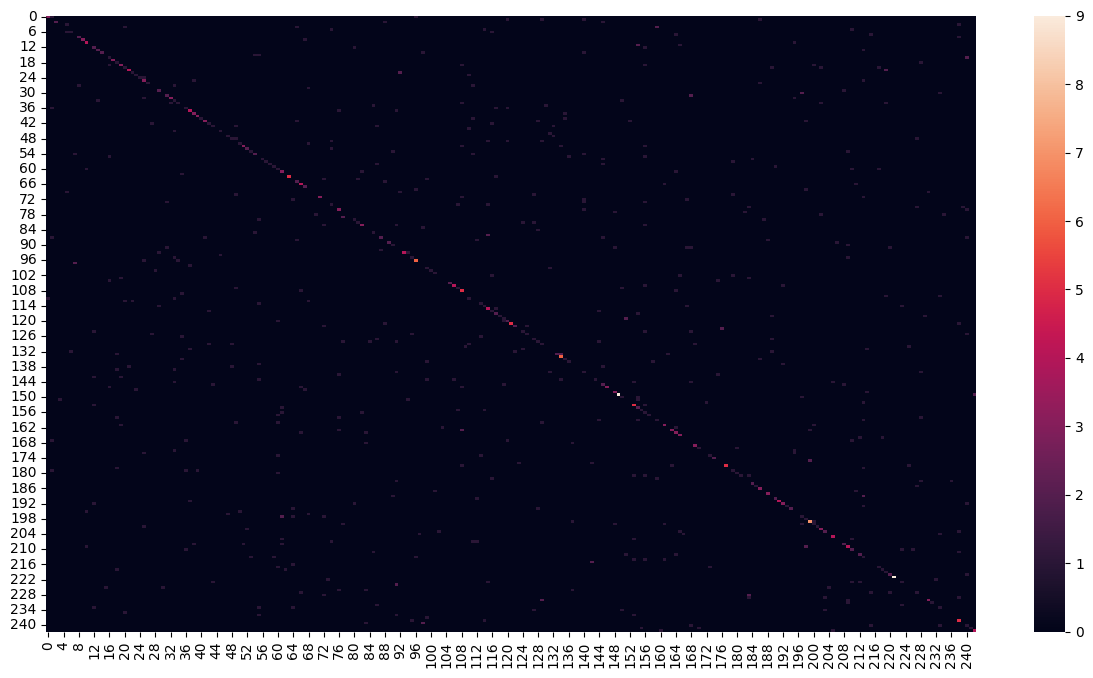

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_1C)
sns.heatmap(conf_matrix)

## Model 1D - Logestic Regression
max iterations = 500

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
classifierD = LogisticRegression(random_state = 10,max_iter=200, penalty='l2',dual=True,solver='liblinear')
classifierD.fit(X_train_vec_1D, y_train_vec)

LogisticRegression(dual=True, max_iter=200, random_state=10, solver='liblinear')

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_1D = classifierD.predict(X_test_vec_1D)

In [ ]:
# predict the output
y_pred_train_1D = classifierD.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_1D))

Training Accuracy Score 1.0


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_1D))
print('Classification report \n',classification_report(y_test_vec,y_pred_1D))

Accuracy Score 0.24829157175398633
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.20      0.25      0.22         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.50      0.50      0.50         2
          17       0.3

<Axes: >

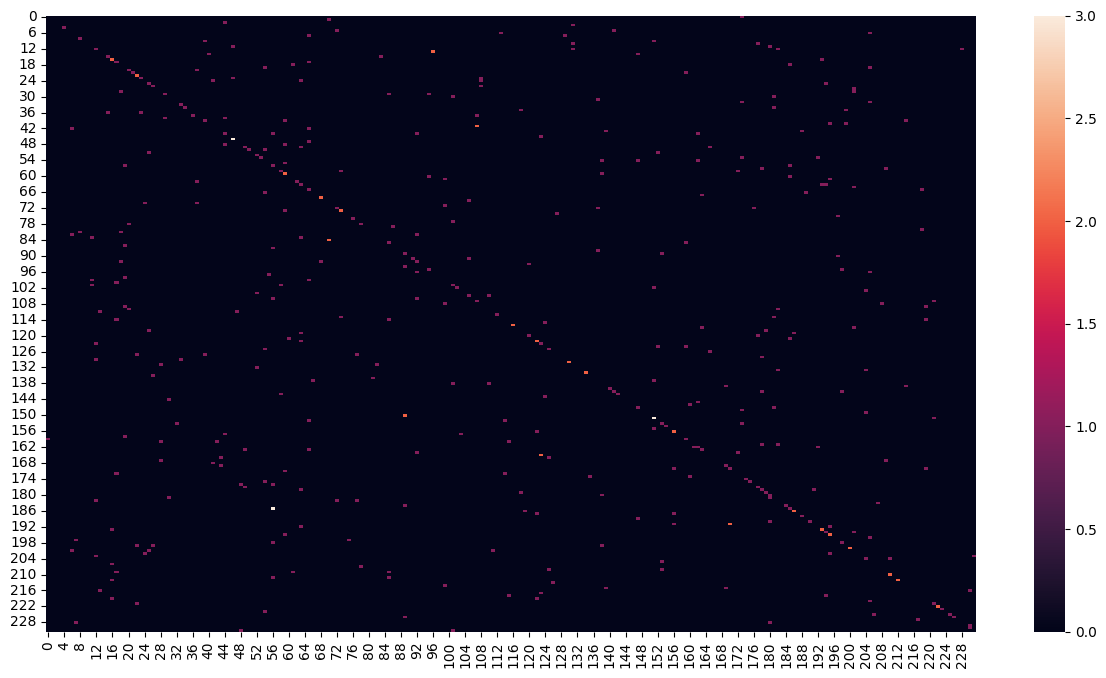

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_1D)
sns.heatmap(conf_matrix)

# K Nearest Neighbour

## Model 2A - KNN

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
# n_neighnors: number of neighbors to consider
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict the output
y_pred_2 = knn_model.predict(X_test_vec_1D)

In [ ]:
# predict the output
y_pred_train_2 = knn_model.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_train_vec,y_pred_train_2))

Accuracy Score 0.46352941176470586


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_2))
print('Classification report \n',classification_report(y_test_vec,y_pred_2))

Accuracy Score 0.16856492027334852
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         2
           7       0.12      0.50      0.20         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.33      0.50      0.40         2
          11       0.10      0.50      0.17         2
          12       0.00      0.00      0.00         2
          13       0.40      0.50      0.44         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.14      0.50      0.22         2
          17       0.1

<Axes: >

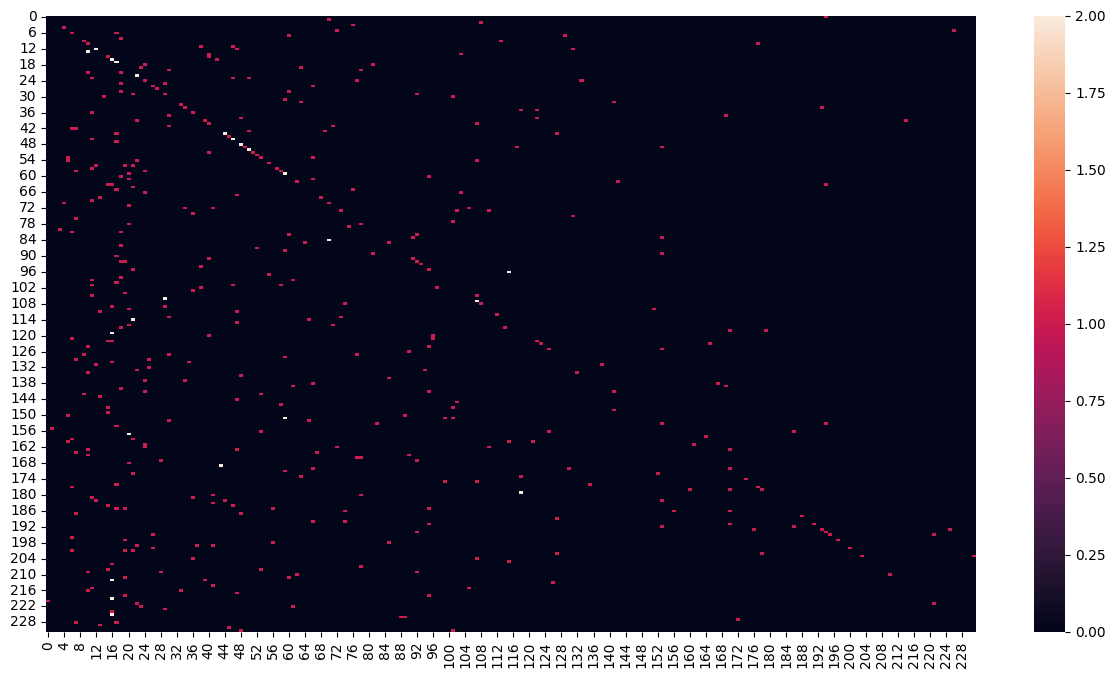

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_2)
sns.heatmap(conf_matrix)

## Model 2B - KNN

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Grid Search CV

In [ ]:
params = {'n_neighbors': range(2, 20)}

In [ ]:
# n_neighnors: number of neighbors to consider
knn_classificationB = KNeighborsClassifier()

gcv = GridSearchCV(estimator=knn_classificationB, param_grid=params, cv=3)

In [ ]:
gcv.fit(X_train_vec_1D, y_train_vec)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 20)})

In [ ]:
gcv.best_params_

{'n_neighbors': 2}

In [ ]:
gcv.best_score_

0.1396078431372549

### Model Building

In [ ]:
# n_neighnors: number of neighbors to consider
knn_classificationB = KNeighborsClassifier(n_neighbors = 2)

# fit the model using fit() on train data
knn_modelB = knn_classificationB.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_2B = knn_modelB.predict(X_test_vec_1D)

In [ ]:
# predict the output
y_pred_train_2B = knn_modelB.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_train_vec,y_pred_train_2B))

Accuracy Score 0.5764705882352941


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_2B))
print('Classification report \n',classification_report(y_test_vec,y_pred_2B))

Accuracy Score 0.19362186788154898
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         2
           7       0.20      0.50      0.29         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         2
          11       0.12      0.50      0.20         2
          12       0.00      0.00      0.00         2
          13       0.67      0.50      0.57         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.17      0.50      0.25         2
          17       0.0

<Axes: >

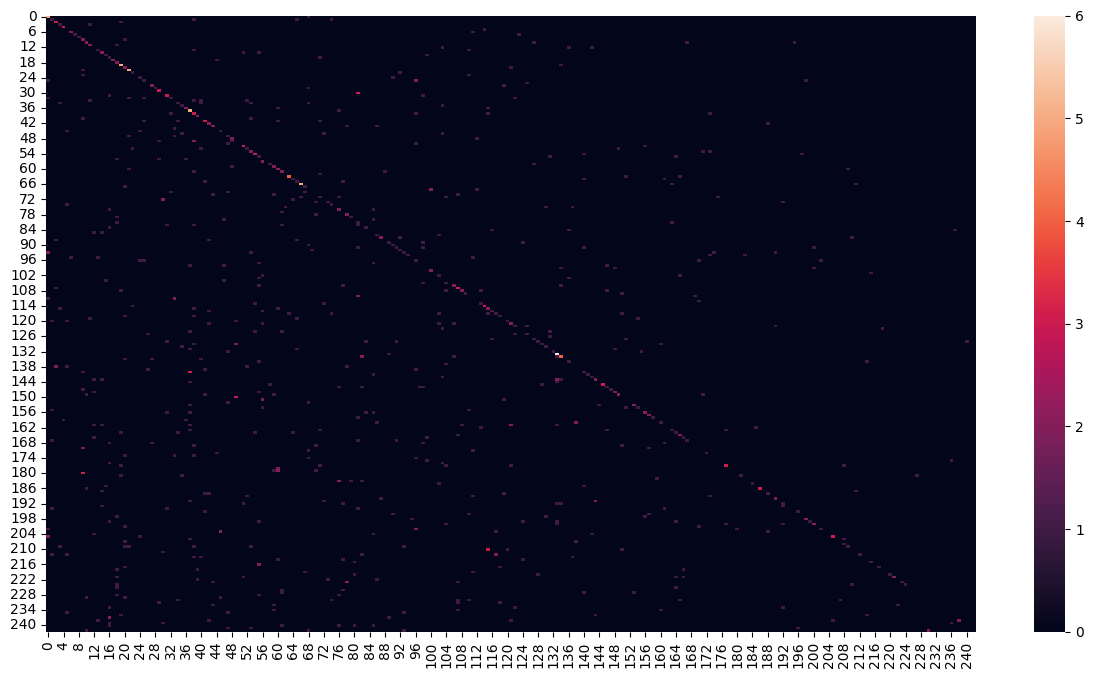

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_2B)
sns.heatmap(conf_matrix)

# Naive Bayes

## Model 3 - Gaussian Naive Bayes Algorithm

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_3 = gnb_model.predict(X_test_vec_1D)

In [ ]:
# predict the output
y_pred_train_3 = gnb_model.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_train_vec,y_pred_train_3))

Accuracy Score 0.8211764705882353


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_3))
print('Classification report \n',classification_report(y_test_vec,y_pred_3))

Accuracy Score 0.1548974943052392
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.17      0.25      0.20         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       1.00

<Axes: >

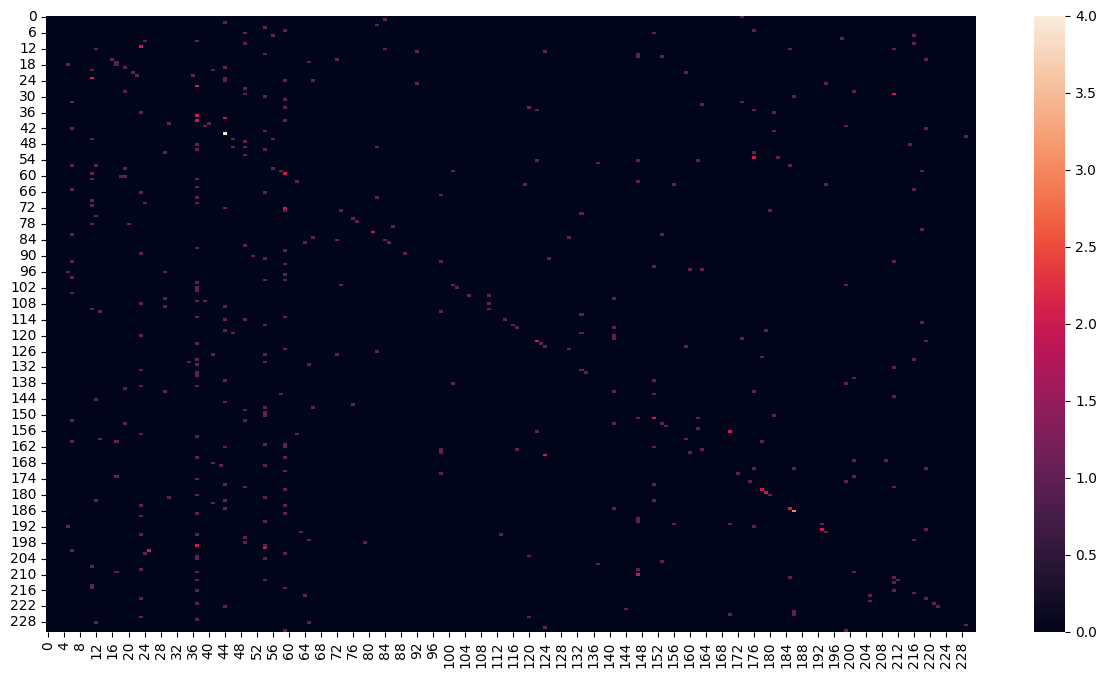

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_3)
sns.heatmap(conf_matrix)

## Model 4 - Multinomial Naive Bayes Algorithm

In [ ]:
print('X_train shape =',X_train_vec_mm.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_mm.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
# instantiate the 'GaussianNB'
mnb = MultinomialNB()

# fit the model using fit() on train data
mnb_model = mnb.fit(X_train_vec_mm, y_train_vec)

### Prediction

In [ ]:
# predict function
y_pred_4 = mnb_model.predict(X_test_vec_1D)

In [ ]:
# predict function
y_pred_train_4 = mnb_model.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_train_vec,y_pred_train_4))

Accuracy Score 0.8211764705882353


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_4))
print('Classification report \n',classification_report(y_test_vec,y_pred_4))

Accuracy Score 0.11678832116788321
Classification report 
               precision    recall  f1-score   support

           1       0.38      0.60      0.46         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         3
          10       0.67      0.50      0.57         4
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         2
          17       0.0

<Axes: >

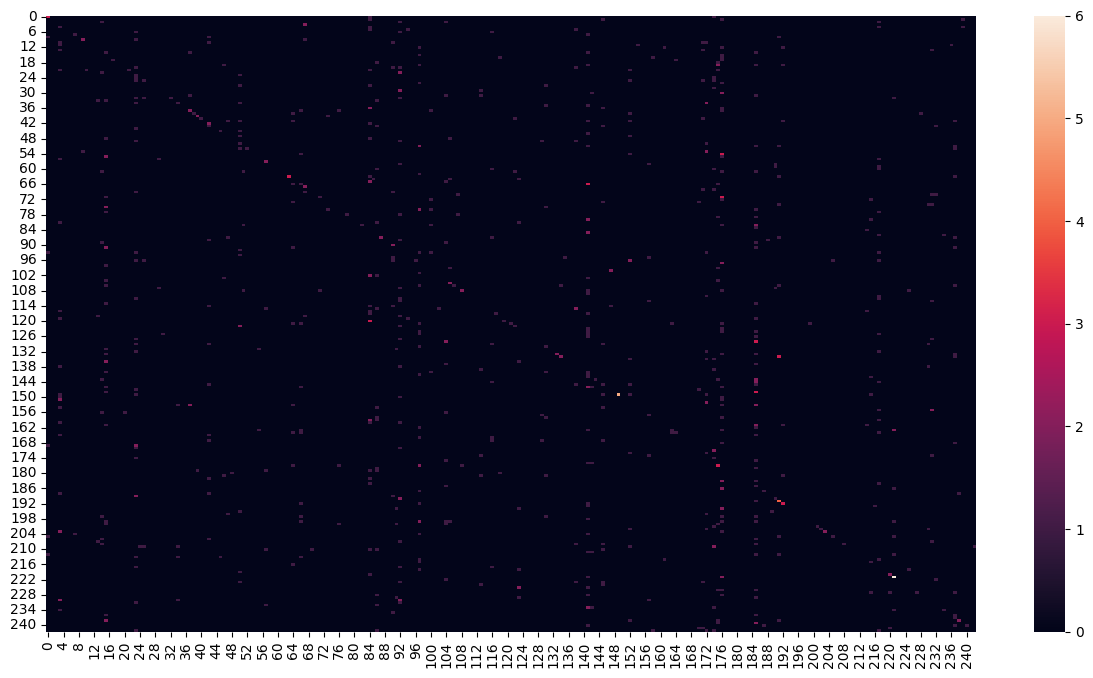

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_4)
sns.heatmap(conf_matrix)

# Decision Tree

## Model 5A - Decision Tree

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_5 = decision_tree.predict(X_test_vec_1D)

In [ ]:
# predict the output
y_pred_train_5 = decision_tree.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_train_vec,y_pred_train_5))

Accuracy Score 1.0


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_5))
print('Classification report \n',classification_report(y_test_vec,y_pred_5))

Accuracy Score 0.32574031890660593
Classification report 
               precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         4
          14       0.50      0.50      0.50         2
          15       0.00      0.00      0.00         2
          16       0.50      0.50      0.50         2
          17       0.5

<Axes: >

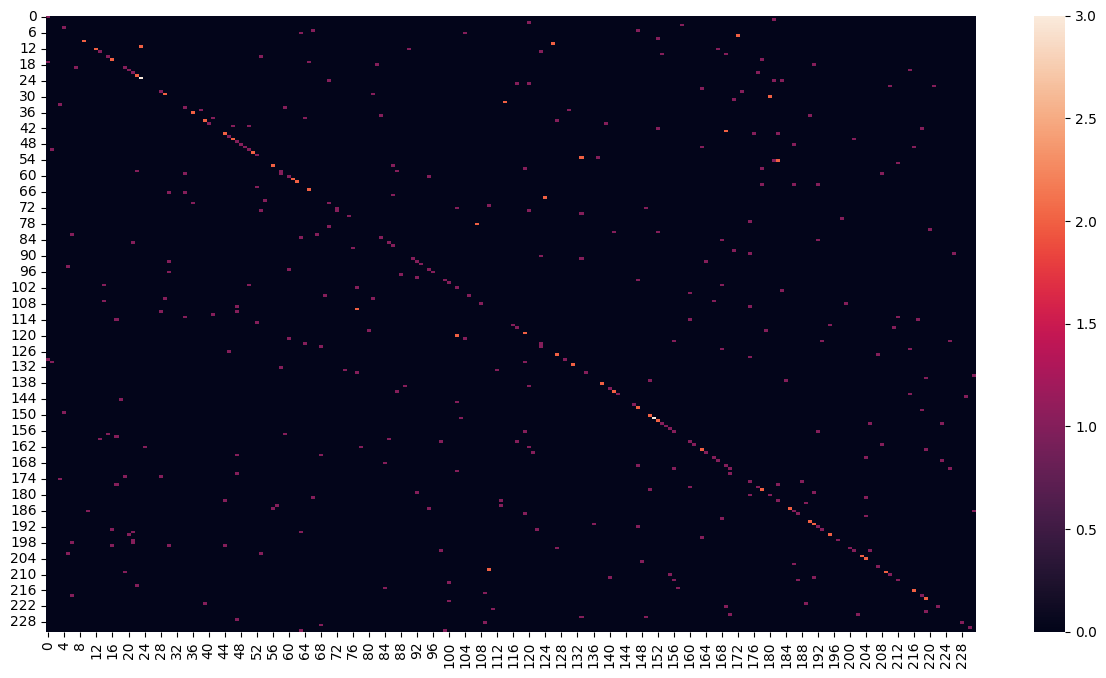

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_5)
sns.heatmap(conf_matrix)

## Model 5B - Decision Tree

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Randomized Search CV

In [ ]:
param_dict = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'min_impurity_decrease': [0.0, 0.1, 0.5]
}

In [ ]:
decision_tree_classification_B = DecisionTreeClassifier()

In [ ]:
rcv = RandomizedSearchCV(
    decision_tree_classification_B,
    param_distributions = param_dict,
    n_jobs= -1,
    cv= 5,
    verbose= 1,
    return_train_score=True
                    )

In [ ]:
rcv.fit(X_train_vec_1D, y_train_vec)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)},
                   return_train_score=True, verbose=1)

In [ ]:
rcv.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_depth': 8,
 'criterion': 'gini'}

In [ ]:
rcv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=6)

In [ ]:
rcv.best_score_

0.07137254901960785

### Model Building

In [ ]:
decision_tree_classification_B = DecisionTreeClassifier( criterion='gini', min_samples_split=6,max_depth=8)
decision_tree_B = decision_tree_classification_B.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_5B = decision_tree_B.predict(X_test_vec_1D)

In [ ]:
# predict function under LogisticRegression
y_pred_train_5B = decision_tree_B.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_5B))

Training Accuracy Score 1.0


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_5B))
print('Classification report \n',classification_report(y_test_vec,y_pred_5B))

Accuracy Score 0.26651480637813213
Classification report 
               precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.20      1.00      0.33         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       1.00      0.25      0.40         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.67      1.00      0.80         2
          17       0.5

<Axes: >

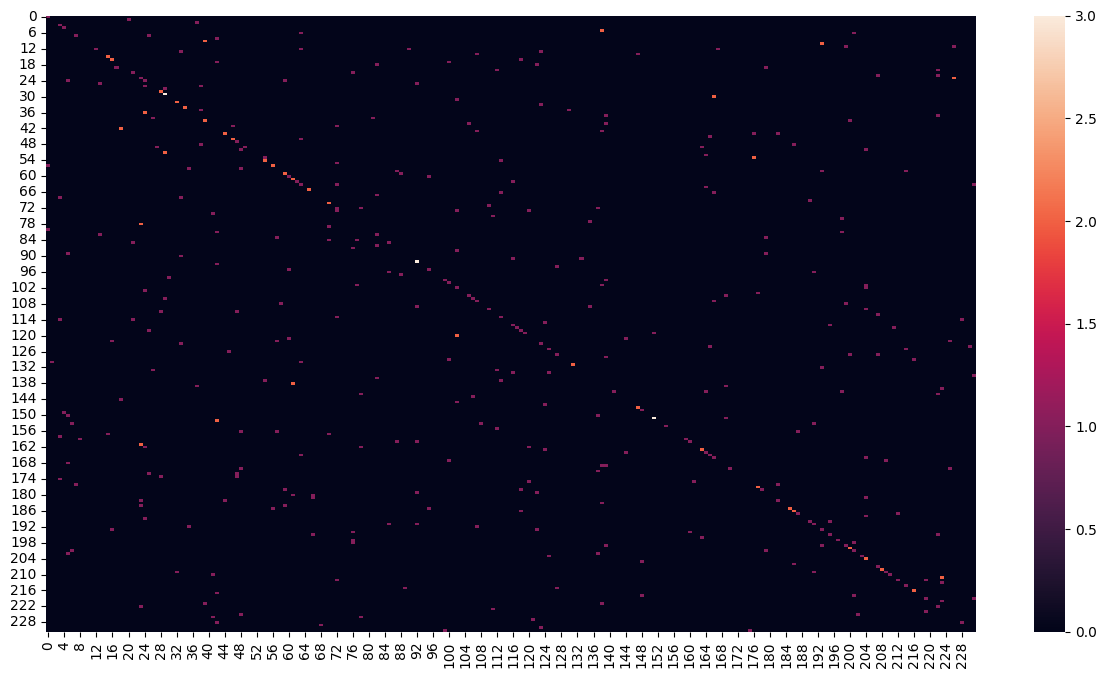

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_5B)
sns.heatmap(conf_matrix)

## Model 5C - Decision Tree

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Grid Search CV

In [ ]:
param_dict = {
    #'criterion': ['entropy','gini'],
    'max_depth': [3,5,7],
    'min_samples_split': [3,5,7]
    #'min_samples_leaf': range(1,5),
    #'min_impurity_decrease': [0.0, 0.1, 0.5]
}

In [ ]:
decision_tree_classification_D = DecisionTreeClassifier(criterion='entropy')

In [ ]:
grid = GridSearchCV(
    decision_tree_classification_D,
    param_grid = param_dict,
    n_jobs= -1,
    cv= 3,
    verbose= 1,
    return_train_score=True
                    )

In [ ]:
grid.fit(X_train_vec_1D, y_train_vec)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [3, 5, 7]},
             return_train_score=True, verbose=1)

In [ ]:
grid.best_params_

{'max_depth': 7, 'min_samples_split': 5}

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)

In [ ]:
grid.best_score_

0.1592920353982301

### Model Building

In [ ]:
decision_tree_classification_C = DecisionTreeClassifier( criterion='entropy', max_depth= 7,
                                                       min_samples_split = 5, random_state = 10)
decision_tree_C = decision_tree_classification_C.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_5C = decision_tree_C.predict(X_test_vec_1D)

In [ ]:
# predict function under LogisticRegression
y_pred_train_5C = decision_tree_C.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_5C))

Training Accuracy Score 0.45647058823529413


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_5C))
print('Classification report \n',classification_report(y_test_vec,y_pred_5C))

Accuracy Score 0.22095671981776766
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1
           6       0.09      0.50      0.15         2
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.10      0.50      0.17         2
          13       0.25      0.50      0.33         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.40      1.00      0.57         2
          17       0.1

<Axes: >

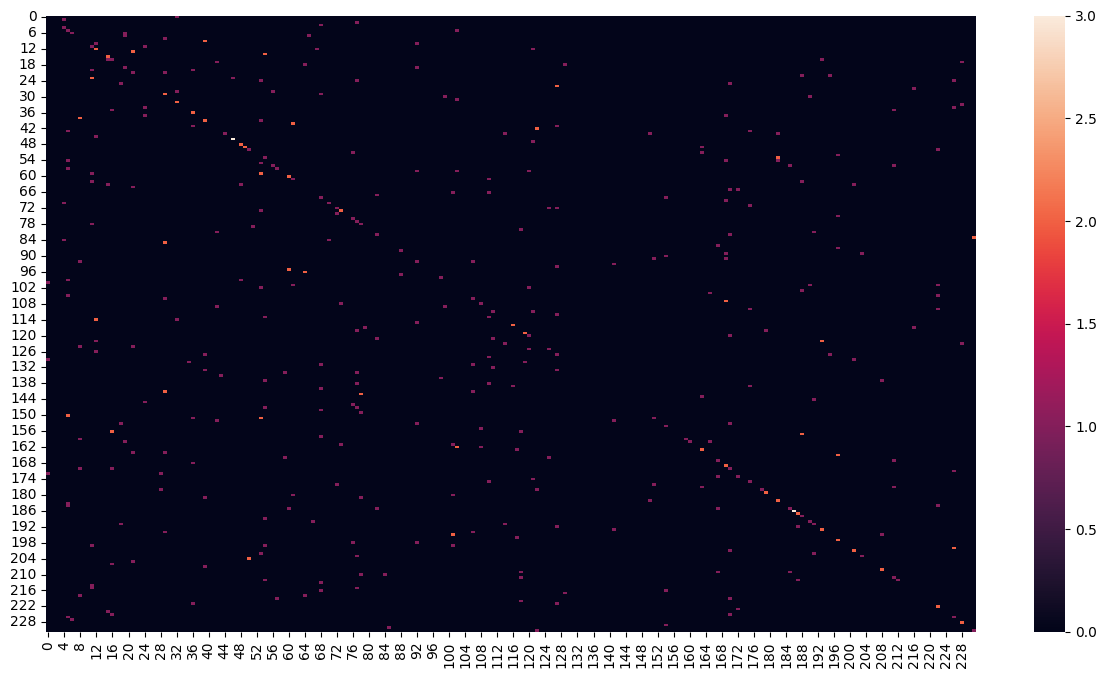

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_5C)
sns.heatmap(conf_matrix)

## Model 5D - Decision tree with Ada Boost

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
decision_tree_classification_D = DecisionTreeClassifier( criterion='entropy', random_state = 10
                                                        # max_depth= 7, min_samples_split = 5,
                                                         )

In [ ]:
adb_classification_D = AdaBoostClassifier( estimator = decision_tree_classification_D, random_state = 10)
#y_train must be encoded in a newer update XGBoost model before training it
adb_5D = adb_classification_D.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function
y_pred_5D = adb_5D.predict(X_test_vec_1D)

In [ ]:
# predict function
y_pred_train_5D = adb_5D.predict(X_train_vec_1D)

### Evaluation

In [ ]:
y_pred_5D[:5]

array([171, 103,   8, 198,  20])

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_5D))

Training Accuracy Score 1.0


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_5D))
print('Classification report \n',classification_report(y_test_vec,y_pred_5D))

Accuracy Score 0.31890660592255127
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       1.00      0.50      0.67         2
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         1
          10       0.40      1.00      0.57         2
          11       0.00      0.00      0.00         2
          12       0.50      0.50      0.50         2
          13       0.67      0.50      0.57         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.2

<Axes: >

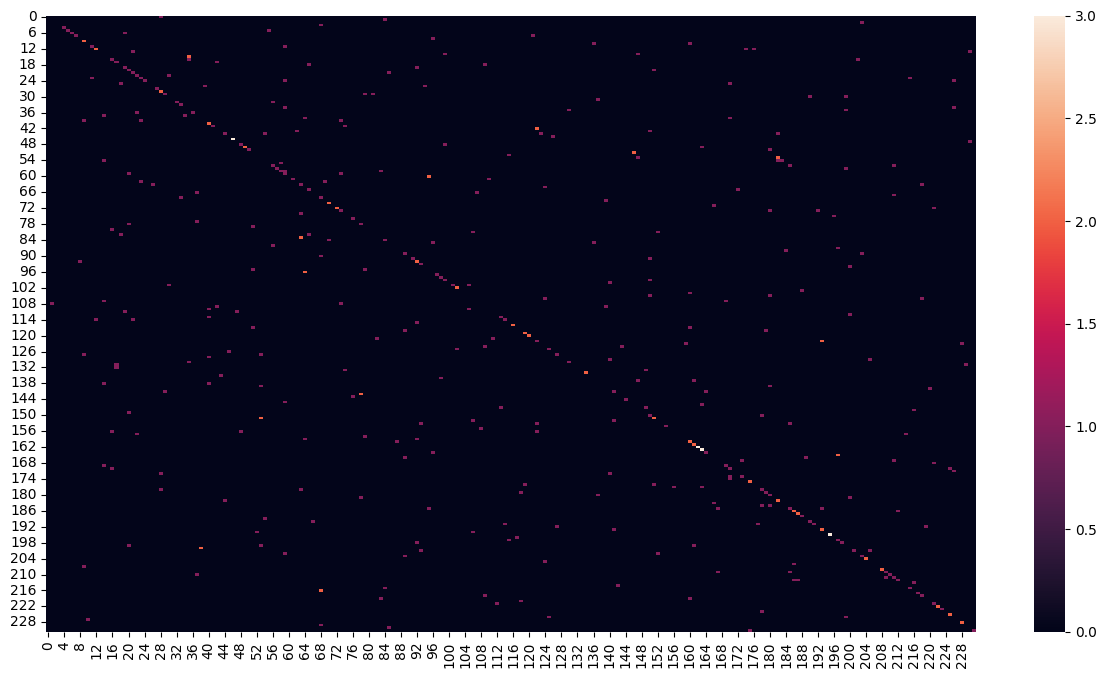

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_5D)
sns.heatmap(conf_matrix)

### Saving the model

In [ ]:
# save the model to disk
#filename = '/content/drive/MyDrive/Mtech_Project/Code/ADA_DT_5E.joblib'
#joblib.dump(adb5E, open(filename, 'wb'))

## Model 5E - Decision Tree with OneVsOne

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
decision_tree_classification5F = DecisionTreeClassifier( criterion='entropy', random_state = 10)

In [ ]:
OVO_classification_5E = OneVsOneClassifier( estimator = decision_tree_classification5F, n_jobs=-1)
#y_train must be encoded in a newer update XGBoost model before training it
ovo_5E = OVO_classification_5E.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function
y_pred_5E = ovo_5E.predict(X_test_vec_1D)

In [ ]:
# predict function
y_pred_train_5E = ovo_5E.predict(X_train_vec_1D)

### Evaluation

In [ ]:
y_pred_5E[:5]

array([  7, 182,   8, 217,  20])

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_5E))

Training Accuracy Score 1.0


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_5E))
print('Classification report \n',classification_report(y_test_vec,y_pred_5E))

Accuracy Score 0.35990888382687924
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.14      0.50      0.22         2
           7       0.11      0.50      0.18         2
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         1
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       1.00      0.50      0.67         2
          13       0.43      0.75      0.55         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.3

<Axes: >

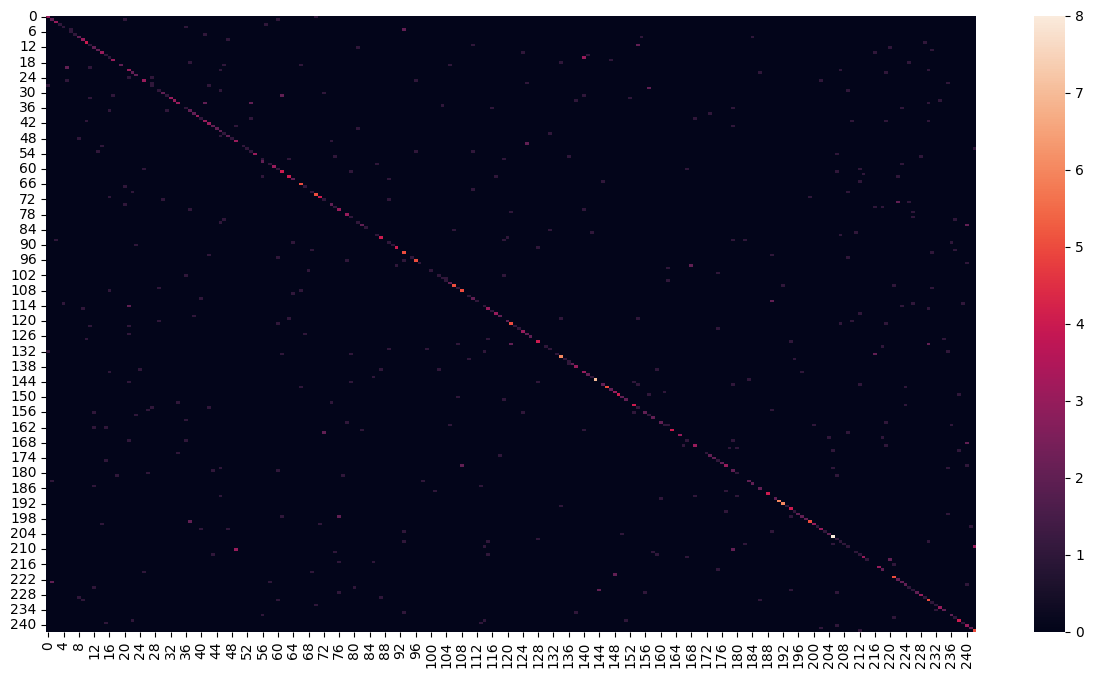

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_5E)
sns.heatmap(conf_matrix)

### Saving the model

In [ ]:
# save the model to disk
#filename = '/content/drive/MyDrive/Mtech_Project/Code/ADA_DT_5E.joblib'
#joblib.dump(adb5E, open(filename, 'wb'))

## Model 5F - Decision Tree with OneVsRest

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
decision_tree_classification_F = DecisionTreeClassifier(criterion='entropy')

In [ ]:
OVR_classifier_5F = OneVsRestClassifier(estimator = decision_tree_classification_F, verbose=2, n_jobs=-1)
classifier_5F = OVR_classifier_5F.fit(X_train_vec_1D, y_train_vec)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 27.5min finished


### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_5F = classifier_5F.predict(X_test_vec_1D)

In [ ]:
# predict function
y_pred_train_5F = classifier_5F.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_5F))

Training Accuracy Score 1.0


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_5F))
print('Classification report \n',classification_report(y_test_vec,y_pred_5F))

Accuracy Score 0.41717049576783555
Classification report 
               precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         4
           3       1.00      0.33      0.50         3
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         3
          10       1.00      0.50      0.67         4
          11       1.00      0.57      0.73         7
          12       0.75      1.00      0.86         3
          13       0.40      0.50      0.44         4
          14       0.67      0.67      0.67         3
          15       1.00      0.25      0.40         4
          16       1.00      0.50      0.67         2
          17       0.5

<Axes: >

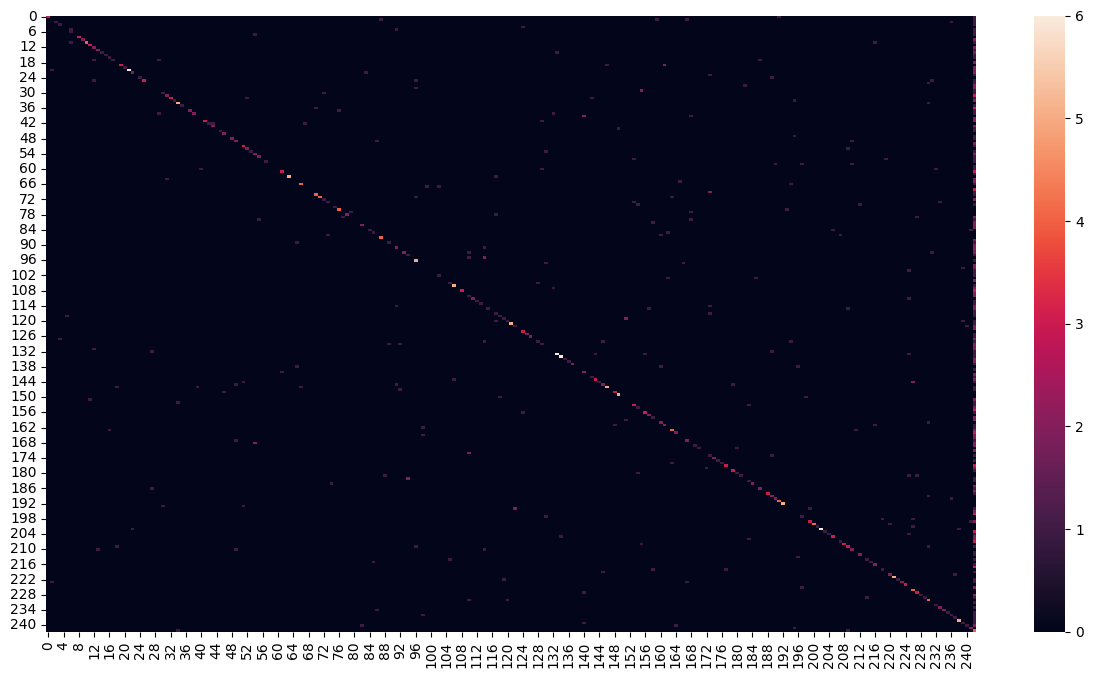

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_5F)
sns.heatmap(conf_matrix)

# Random Forest

## Model 6A - Random Forest

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Model Building

In [ ]:
random_forest_classification = RandomForestClassifier(random_state = 10)
random_forest = random_forest_classification.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_6 = random_forest.predict(X_test_vec_1D)

In [ ]:
# predict function under LogisticRegression
y_pred_train_6 = random_forest.predict(X_train_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Training Accuracy Score',accuracy_score(y_train_vec,y_pred_train_6))

Training Accuracy Score 1.0


In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_6))
print('Classification report \n',classification_report(y_test_vec,y_pred_6))

Accuracy Score 0.6947608200455581
Classification report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       0.33      0.50      0.40         2
           8       1.00      0.50      0.67         2
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       0.00      0.00      0.00         2
          13       0.80      1.00      0.89         4
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         2
          16       1.00      0.50      0.67         2
          17       0.40

<Axes: >

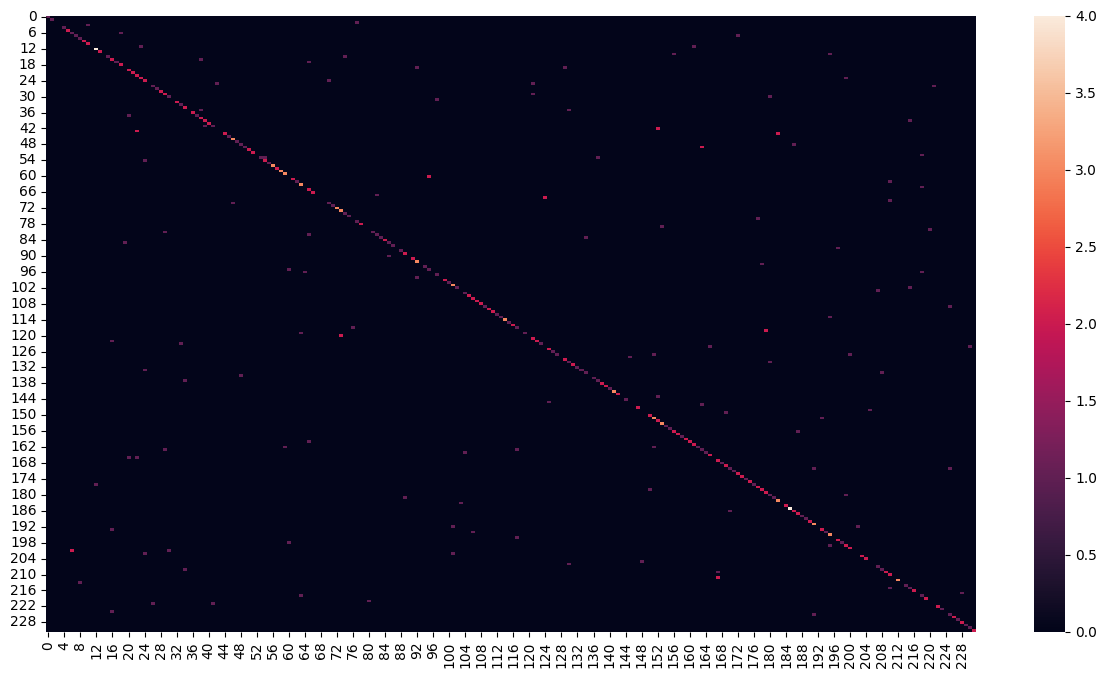

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_6)
sns.heatmap(conf_matrix)

## Model 6B - Random Forest

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1275, 11050)
y_train shape = (1275,)
X_test shape = (439, 11050)
y_test shape = (439,)


### Randomized Search CV

In [ ]:
param_dict = {
    'criterion': ['gini','entropy'],
    'n_estimators': range(50,500),
    'max_depth': range(1,10),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'min_impurity_decrease': [0.0, 0.1, 0.5],
    'warm_start': [True,False]
}

In [ ]:
random_forest_classificationB = RandomForestClassifier()

In [ ]:
rcv = RandomizedSearchCV(
    random_forest_classificationB,
    param_distributions = param_dict,
    n_jobs= -1,
    cv= 5,
    verbose= 3,
    return_train_score=True
                    )

In [ ]:
rcv.fit(X_train_vec_1D, y_train_vec)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(50, 500),
                                        'warm_start': [True, False]},
                   return_train_score=True, verbose=3)

In [ ]:
rcv.best_params_

{'warm_start': False,
 'n_estimators': 180,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_depth': 5,
 'criterion': 'entropy'}

In [ ]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=6,
                       n_estimators=180)

In [ ]:
rcv.best_score_

0.4196078431372549

### Model Building

In [ ]:
random_forest_classificationB = RandomForestClassifier(warm_start= False,n_estimators= 180,
                                                       min_samples_split= 6,min_samples_leaf= 1,
                                                       min_impurity_decrease= 0.0, max_depth= 5,
                                                       criterion = 'entropy', random_state = 10)
random_forestB = random_forest_classificationB.fit(X_train_vec_1D, y_train_vec)

### Prediction

In [ ]:
# predict function under LogisticRegression
y_pred_6B = random_forestB.predict(X_test_vec_1D)

### Evaluation

In [ ]:
# Print the results
print('Accuracy Score',accuracy_score(y_test_vec,y_pred_6B))
print('Classification report \n',classification_report(y_test_vec,y_pred_6B))

Accuracy Score 0.3940774487471526
Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         2
          11       0.67      1.00      0.80         2
          12       0.20      1.00      0.33         2
          13       0.50      0.75      0.60         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       1.00      0.50      0.67         2
          17       0.14

<Axes: >

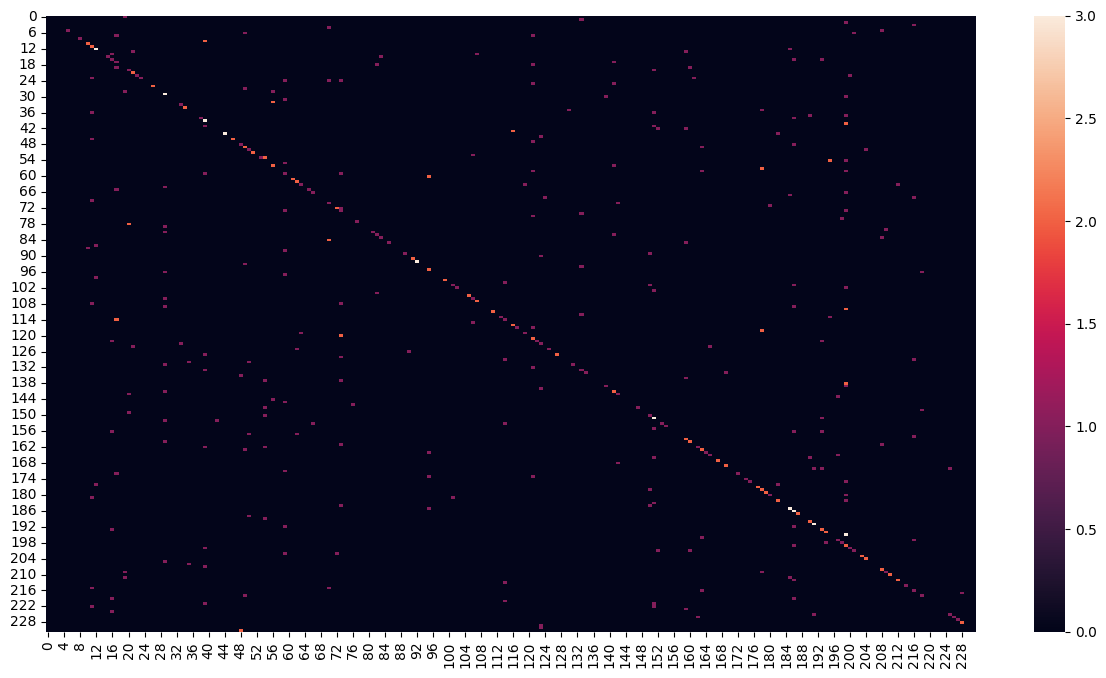

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_vec,y_pred_6B)
sns.heatmap(conf_matrix)